In [ ]:
# pip install pandas seaborn scipy

In [2]:
import pandas as pd

In [4]:
# Sample DataFrame with multi-level columns
df_multi = pd.DataFrame({
    ('SalesAmount', 'North'): [200, 300],
    ('SalesAmount', 'South'): [150, 400]
}, index=['Product1', 'Product2'])

# Stack the DataFrame
df_stacked = df_multi.stack()
print(df_stacked)
#print(df_multi)

                SalesAmount
Product1 North          200
         South          150
Product2 North          300
         South          400


/tmp/ipykernel_23097/1638998934.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_multi.stack()


### Handling Outliers

Outliers are data points that significantly deviate from the rest of the dataset. They can be caused by data entry errors, anomalies, or genuine variability. It’s important to handle outliers appropriately, as they can skew results and affect the performance of models.

Detecting Outliers with Box Plots

As discussed earlier, box plots are effective for detecting outliers. Points that fall outside 1.5 times the interquartile range (IQR) are considered outliers.

<Axes: xlabel='SalesAmount'>

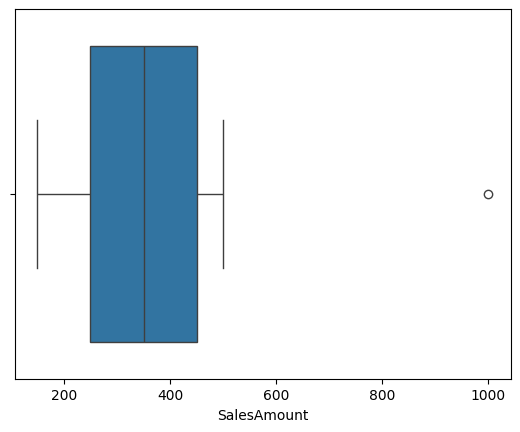

In [7]:
import seaborn as sns

# Sample DataFrame
data = {'SalesAmount': [200, 150, 400, 300, 250, 350, 450, 500, 1000]}
df = pd.DataFrame(data)

# Box plot to detect outliers
sns.boxplot(x=df['SalesAmount'])


### Detecting Outliers with Z-Scores

A Z-score represents how many standard deviations a data point is from the mean. A Z-score greater than 3 or less than -3 typically indicates an outlier.


In [8]:

from scipy import stats

# Calculate Z-scores
df['Z_Score'] = stats.zscore(df['SalesAmount'])

# Filter out outliers (Z-score > 3 or < -3)
df_outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print(df_outliers)


Empty DataFrame
Columns: [SalesAmount, Z_Score]
Index: []


In [9]:
# Handling Outliers

# After detecting outliers, you can decide whether to:

# Remove outliers: If the outliers are likely to distort the analysis and are not meaningful.

# Remove outliers from the dataset
df_cleaned = df[(df['Z_Score'] <= 3) & (df['Z_Score'] >= -3)]
# Cap or clip outliers: Replace outliers with a threshold value.

# Cap the values at 99th percentile
threshold = df['SalesAmount'].quantile(0.99)
df['SalesAmount'] = df['SalesAmount'].apply(lambda x: min(x, threshold))

### Normalizing and Transforming Data

For numerical data, normalization or scaling is often necessary before analysis or modeling, especially when the data has different units or ranges.

Min-Max Scaling

Min-max scaling transforms the data to a range between 0 and 1.

In [ ]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['SalesAmount']] = scaler.fit_transform(df[['SalesAmount']])
print(df)


Log Transformation

Log transformation is useful for handling data with a long tail or skewed distribution.


In [ ]:

# Apply log transformation
df['LogSalesAmount'] = np.log(df['SalesAmount'] + 1)

### Handling Missing Time Data

Time series data often has missing time periods, which can affect your analysis. You can handle these gaps by either filling the missing values or using interpolation techniques.

Filling Missing Time Periods

The asfreq() function is used to convert the DataFrame to a specified frequency, filling in any missing time periods with NaN. Assuming that we are using the same dataframe from the previous section:


In [ ]:

# Convert to daily frequency and fill missing dates
df_filled = df.asfreq('D')
print(df_filled)

In [ ]:
# Interpolating Missing Data

# You can interpolate missing data based on the known values before and after the gaps.

# Interpolate missing values in the SalesAmount column
df_interpolated = df_filled.interpolate()
print(df_interpolated)